# Everything is far apart in high dimensional spaces
The most important thing to understand about high dimensional spaces is that they are **big**.  In ML, it's common to deal with a vector space that has 1,000 dimensions.  $ \mathbb{R}^{1000} $ is big.  So big that a bunch of things in your standard intuition fall apart.  For example these spaces are so big that datapoints in these spaces often have nothing nearby.  The spaces become so big that everything is far apart.

A key conclusion of this exercise **tl;dr: every data point is almost equidistant from every other data point** for a randomly generated set of data in a high dimensional space.  This is increasingly true as the dimensionality increases.

In [1]:
# Import some basics
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [2]:
# Define some functions we'll use later
def dataset_hypercube(n:int, d:int) -> np.ndarray:
    """Generates a random dataset in the unit hypercube
    """
    return np.random.uniform(0,1, size=(n,d))

def pairwise_distance(data:np.ndarray) -> np.ndarray:
    """Given an (N,d) array, returns the (N,N) array of pairwise distances between each element.
    Calculates Euclidean distance, a.k.a. L2 distance.
    """
    N = data.shape[0]
    # Do this the slow way to make the code easy to read and gain confidence in the algorithm
    out = np.zeros((N,N))
    for i in range(N):
        a = data[i,:]
        for j in range(N):
            b = data[j,:]
            dist = np.linalg.norm(a-b)
            # Certainly you can do this faster with fancy linear algebra, but the code is much less clear
            out[i,j] = dist
    return out

## Distance between random points in unit hypercube

Let's generate a set of N random points uniformly distributed in a D-dimensional unit hypercube.  Which is a bunch of D-vectors, where every dimension has a value in the range (0,1).  

Then we will calculate the distance between every pair of points, and see how far apart they each are.  Because we're considering every possible pair of points, ($N^2$ distances), we will sometimes be measuring the distance from a point to itself, which is exactly zero.  For now let's just leave those in there, but know that the $N$ distances which are zero are special for this reason.


The dimensionality of the dataset is (500, 2)


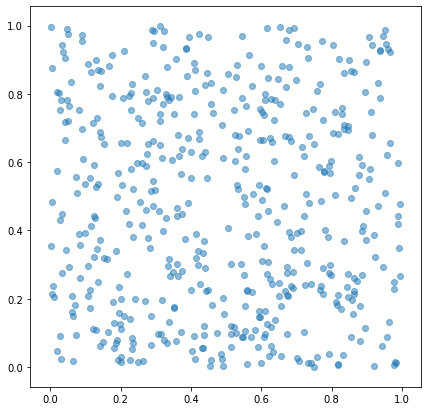

In [3]:
# Start with a simple 2-dimensional space, because it's familiar
N = 500
D = 2
data = dataset_hypercube(N, D)
print(f"The dimensionality of the dataset is {data.shape}")

# Plot the points themselves just to see them
plt.figure(figsize=(7,7))
plt.scatter(x=data[:,0], y=data[:,1], alpha=0.5)
plt.show()

The distance matrix is shaped (500, 500)
or as a vector of length (250000,)
Basic statistics: minimum=0.0, mean=0.5222586363626208, maximum=1.3922897803574834


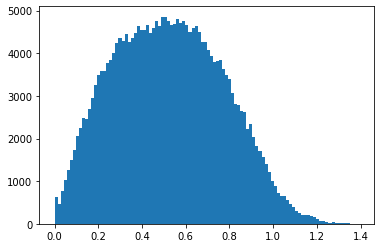

In [4]:
# Now let's calculate all the pairwise-distances.  This will be an NxN matrix.
dist_pairs = pairwise_distance(data)
print(f"The distance matrix is shaped {dist_pairs.shape}")
all_dist = dist_pairs.ravel()  # Convert to a vector 
print(f"or as a vector of length {all_dist.shape}")
print(f"Basic statistics: minimum={all_dist.min()}, mean={all_dist.mean()}, maximum={all_dist.max()}")
plt.hist(all_dist, 100)
plt.show()

### ... commentary about 2-dimensions
We see that the distance between points in 2 dimensions is typically about 0.5, with a nice smooth distribution.  The largest possible value is $\sqrt{2} \approx 1.414$, which would be for two points in the opposite corners of the square.  We see that in our smallish dataset we have a value that gets somewhat close to that.  Raise N to something large, and you'll get very close.

## Higher dimensionality
Now let's automate the process of analyzing the distances between random points for lots of different dimensions so we can see the trend.  Note that in higher dimensions, the largest possible value for distance between two points would be $\sqrt{D}$ for $D$ dimensions, when two points are at completely opposite corners in the hyper-cube.  Again, we'll see in each histogram that bump of $N$ distances which are exactly $0$, corresponding to measuring the distance from a point to itself.  Visually this helps ground the progression as the distribution changes.

Max possible distance sqrt(1) = 1.0000


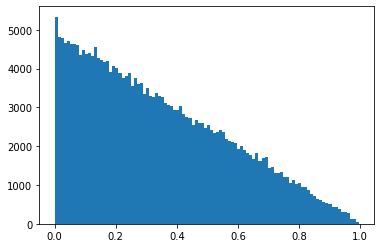

Max possible distance sqrt(2) = 1.4142


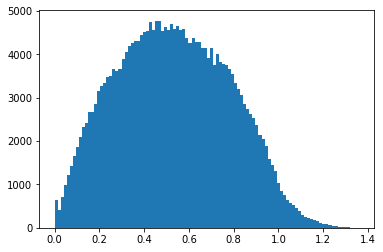

Max possible distance sqrt(3) = 1.7321


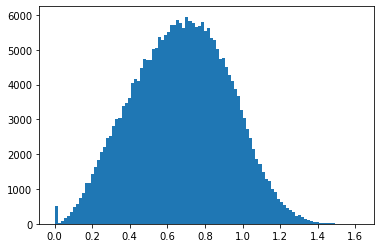

Max possible distance sqrt(4) = 2.0000


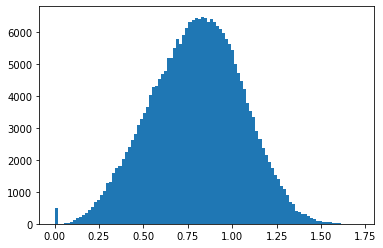

Max possible distance sqrt(8) = 2.8284


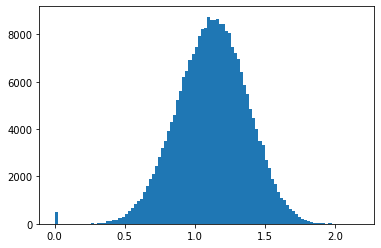

Max possible distance sqrt(16) = 4.0000


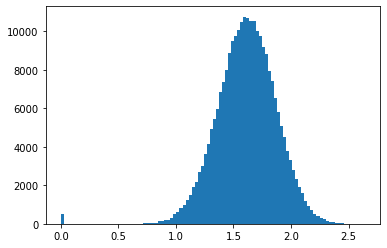

Max possible distance sqrt(32) = 5.6569


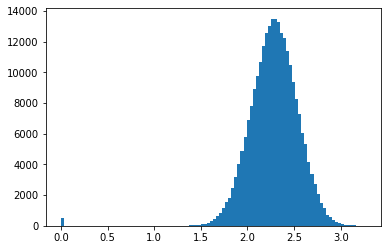

Max possible distance sqrt(64) = 8.0000


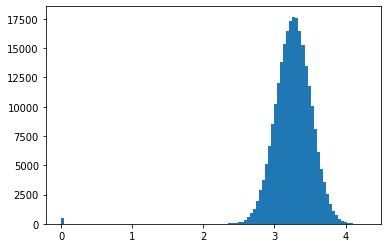

Max possible distance sqrt(128) = 11.3137


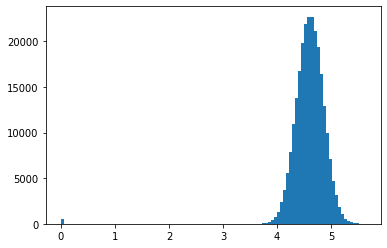

Max possible distance sqrt(256) = 16.0000


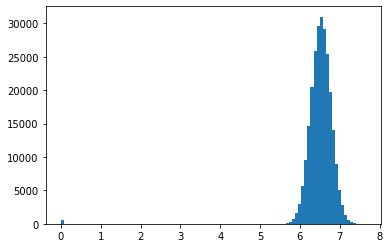

Max possible distance sqrt(512) = 22.6274


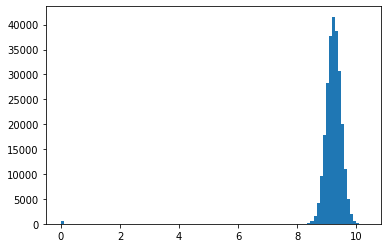

Max possible distance sqrt(1024) = 32.0000


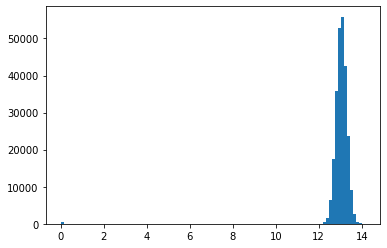

Max possible distance sqrt(2048) = 45.2548


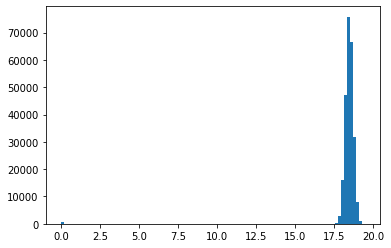

Max possible distance sqrt(4096) = 64.0000


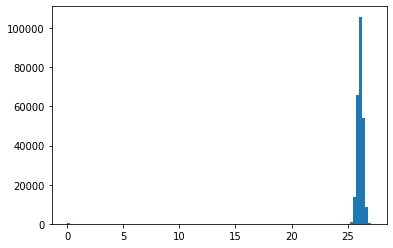

In [5]:
N = 500
for D in [1,2,3,4,8,16,32,64,128,256,512,1024,2048,4096]:
    display(HTML(f"<h3>{D} dimensions</h3>"))
    print(f"Max possible distance sqrt({D}) = {math.sqrt(D):.4f}")
    data = dataset_hypercube(N, D)
    dist = pairwise_distance(data)
    plt.hist(dist.ravel(), 100)
    plt.show()

### ... commentary

As you can see, in a high dimensional space, every point in a random dataset is about equi-distant from every other point.  In general, no points are especially "close" to each other and no points are particularly "far" away from each other either.

Now these are random points.  So when you're instead dealing with real-world data, actual structure will appear making some points much together than others.  This structure is critical and important.  But the key intuition to remember here is that **high dimensional spaces are big** and this bigness means that **points tend to be pretty far apart from each other**.